# Exercise 1: Sphere Packing
Kanishk Bhatia | 
Matrikelnummer: 03739535

In [1]:
# from phi.flow import *
from phi.torch.flow import *
math.set_global_precision(64)

## (a) Setup

### Create Spheres

In [60]:
n_particles = 6 
radius_1 = 1.0
radius_2 = 0.7

space_low = 0
space_high = 55

eps=0.000001

In [16]:
samples = numpy.random.uniform(low=space_low, high=space_high, size=([n_particles,2]))
x = math.tensor(samples, instance('particles'), channel(vector='x,y'))
x
# radii = numpy.full(([n_particles,1]), radius_1)
# radii[int(n_particles/2):] = radius_2
# samples = np.append(samples, radii, axis=1)
# x = math.tensor(samples, instance('particles'), channel(vector='x,y,radius'))

(particlesⁱ=6, vectorᶜ=x,y) float64  26.553 ± 18.171 (1e+00...5e+01)

In [17]:
# vis.plot( PointCloud(Sphere(x.vector['x','y'], radius=x.vector['radius']), bounds=Box(x=(space_low, space_high),y=(space_low, space_high))))

In [18]:
radii = [1]*int(n_particles/2) + [0.7]*int(n_particles/2)
radii_tensor = math.stack(radii, instance('particles'))
radii_tensor

(1.0, 1.0, 1.0, 0.7, 0.7, 0.7) along particlesⁱ

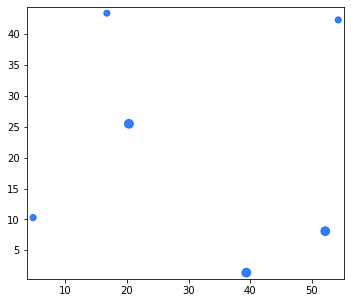

<Figure size 432x288 with 0 Axes>

In [19]:
vis.plot( PointCloud(Sphere(x, radius=radii_tensor, bounds=Box(x=(space_low, space_high),y=(space_low, space_high)))))

## (b) Energy Function

#### Overlap
For each particle
$ overlap_{self,other} = r_{self} + r_{other} - distance_{self,other} = r_{self+other} - distance_{self,other} $

#### Energy function
$ E = 0 $                   for overlap < 0

$ E = C.overlap^2 $         otherwise (some constant C)

distance ```dx = x - math.rename_dims(x, ’particles’, ’others’)```

In [78]:
def calculate_energy(x, radii_tensor):
    '''
    Calculate energy of each particle vs another particle.
    Return an N by N matrix
    
    Args:
        x: Tensor containing particle positions (instances, vector)
        radii_tensor: tensor containing particle radii 
    
    '''
    r = x - math.rename_dims(x, 'particles', 'i')
    distances = math.vec_length(r, eps=eps) # using an epsilon to avoid zero on diagonals... in order to avoid inf gradients later
    # print('distances:')
    # math.print(distances)
    radii_sums = radii_tensor + math.rename_dims(radii_tensor, 'particles', 'i')
    # print('sum of radii:')
    # math.print(radii_sums)
    overlaps = radii_sums - distances
    overlaps = math.where(overlaps>=0, overlaps, 0) # set negative overlaps to zero
    # print('overlaps: ')
    # math.print(overlaps)

    C = 0.1 # nach deiner Wahl
    Energy_tensor = C * overlaps * overlaps

    # Set diagonal energy to zero(eps)
    Energy_numpy = Energy_tensor.numpy('particles,i')
    np.fill_diagonal(Energy_numpy, eps)
    Energy_tensor = tensor(Energy_numpy, Energy_tensor.shape)
    print("Energy Tensor:")
    math.print(Energy_tensor)
    return Energy_tensor

Energy_tensor = calculate_energy()

Energy Tensor:
(particlesⁱ=6, iⁱ=6)
[[1.e-06, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
 [0.e+00, 1.e-06, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
 [0.e+00, 0.e+00, 1.e-06, 0.e+00, 0.e+00, 0.e+00],
 [0.e+00, 0.e+00, 0.e+00, 1.e-06, 0.e+00, 0.e+00],
 [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-06, 0.e+00],
 [0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-06]]


## (c) 